In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
%matplotlib inline

In [60]:
data=pd.read_csv("MNIST_train.csv")
data2=pd.read_csv("MNIST_test.csv")

In [61]:
data.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#find a set of values that are your values and your data (X, y)

In [62]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat)

In [63]:
os.getcwd()

'C:\\Users\\Field Employee'

 # convert  from pandas to numpy  

In [64]:
X = data.to_numpy()

In [65]:
X

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]], dtype=int64)

In [66]:
data.info

<bound method DataFrame.info of        Unnamed: 0  index  labels  0  1  2  3  4  5  6  ...  774  775  776  \
0               0      0       5  0  0  0  0  0  0  0  ...    0    0    0   
1               1      1       0  0  0  0  0  0  0  0  ...    0    0    0   
2               2      2       4  0  0  0  0  0  0  0  ...    0    0    0   
3               3      3       1  0  0  0  0  0  0  0  ...    0    0    0   
4               4      4       9  0  0  0  0  0  0  0  ...    0    0    0   
...           ...    ...     ... .. .. .. .. .. .. ..  ...  ...  ...  ...   
59995       59995  59995       8  0  0  0  0  0  0  0  ...    0    0    0   
59996       59996  59996       3  0  0  0  0  0  0  0  ...    0    0    0   
59997       59997  59997       5  0  0  0  0  0  0  0  ...    0    0    0   
59998       59998  59998       6  0  0  0  0  0  0  0  ...    0    0    0   
59999       59999  59999       8  0  0  0  0  0  0  0  ...    0    0    0   

       777  778  779  780  781  782  783  


In [134]:
data2.info

<bound method DataFrame.info of       Unnamed: 0  index  labels  0  1  2  3  4  5  6  ...  774  775  776  777  \
0              0      0       7  0  0  0  0  0  0  0  ...    0    0    0    0   
1              1      1       2  0  0  0  0  0  0  0  ...    0    0    0    0   
2              2      2       1  0  0  0  0  0  0  0  ...    0    0    0    0   
3              3      3       0  0  0  0  0  0  0  0  ...    0    0    0    0   
4              4      4       4  0  0  0  0  0  0  0  ...    0    0    0    0   
...          ...    ...     ... .. .. .. .. .. .. ..  ...  ...  ...  ...  ...   
9995        9995   9995       2  0  0  0  0  0  0  0  ...    0    0    0    0   
9996        9996   9996       3  0  0  0  0  0  0  0  ...    0    0    0    0   
9997        9997   9997       4  0  0  0  0  0  0  0  ...    0    0    0    0   
9998        9998   9998       5  0  0  0  0  0  0  0  ...    0    0    0    0   
9999        9999   9999       6  0  0  0  0  0  0  0  ...    0    0    0    0

### extract the column that contains the labels (y) which is contained in column 3, to acces col3 so you pass all rows by using (:) and identify the third column using the indes (2), so we have [ : , 2 ] all rows of column 3. the next step is to extract all the features contained in X, which has all rows and columns except the lables and first two useless columns, so to extract them we need all rows anf columns from 4 to all the way to the end. To do that, we extract all rows using the colon operator (:) and all columns from 4 to the end using (3 :) 3 then colon means all columns from 3 to the end. 

In [67]:
y =X[:,2]

In [69]:
y
print(y)

[5 0 4 ... 5 6 8]


In [70]:
X=X[:,3:]

In [71]:
X.shape
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [72]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [73]:
#plt.iamshow

def show_me(X):
    plt.imshow(X.reshape(28,28))

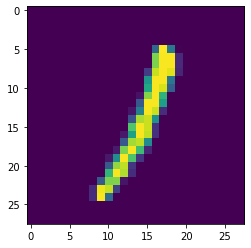

In [74]:
show_me(X[0,:])
show_me(X[99,:])

In [75]:
y[99]

1

In [76]:
y[0]

5

In [77]:
data.info

<bound method DataFrame.info of        Unnamed: 0  index  labels  0  1  2  3  4  5  6  ...  774  775  776  \
0               0      0       5  0  0  0  0  0  0  0  ...    0    0    0   
1               1      1       0  0  0  0  0  0  0  0  ...    0    0    0   
2               2      2       4  0  0  0  0  0  0  0  ...    0    0    0   
3               3      3       1  0  0  0  0  0  0  0  ...    0    0    0   
4               4      4       9  0  0  0  0  0  0  0  ...    0    0    0   
...           ...    ...     ... .. .. .. .. .. .. ..  ...  ...  ...  ...   
59995       59995  59995       8  0  0  0  0  0  0  0  ...    0    0    0   
59996       59996  59996       3  0  0  0  0  0  0  0  ...    0    0    0   
59997       59997  59997       5  0  0  0  0  0  0  0  ...    0    0    0   
59998       59998  59998       6  0  0  0  0  0  0  0  ...    0    0    0   
59999       59999  59999       8  0  0  0  0  0  0  0  ...    0    0    0   

       777  778  779  780  781  782  783  


In [78]:
data2.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X2=data2.to_numpy()

In [80]:
y2=X2[:,2]
y2

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [81]:
X2=X2[:,3:]
X2
X2=X2/255
X2.shape

(10000, 784)

In [ ]:
# use X, y as the training set and y for trainig 

In [82]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [85]:
gnb = GaussNB()
gnb.fit(X,y)
y_hat = gnb.predict(X2)

In [ ]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [86]:
print(f"Accuracy: {accuracy(y2, y_hat):0.3f}")

Accuracy: 0.144


In [87]:
X=X/255
# divide by 255 to normalize(max value)

In [88]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
class GaussNB():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":X_k.var(axis=0) + epsilon}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
        return P_hat.argmax(axis = 1)

In [90]:
gnb = GaussNB()
gnb.fit(X,y)
y_hat = gnb.predict(X)

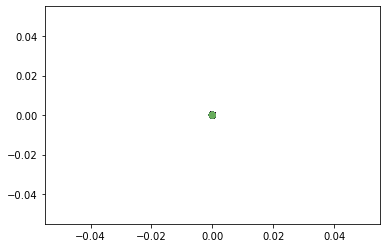

In [91]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c = y_hat, alpha = 0.25)

In [93]:
print(f"Accuracy: {accuracy(y, y_hat):0.3f}")

Accuracy: 0.768


## Naive Bayes Gaussian is crappy, the accuracy is very low

##  Try Gaussian Bayes but not naive, the accuracy should  be much better

In [94]:
class GaussBayes():
    def fit(self, X, y, epsilon = 1e-3):
        self.likelihoods = dict()
        self.priors = dict()
        
        self.K = set(y.astype(int))
        
        for k in self.K:
            X_k = X[y == k,:]
            N_k, D = X_k.shape
            mu_k=X_k.mean(axis=0)
            self.likelihoods[k] = {"mean":X_k.mean(axis=0), "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+ epsilon*np.identity(D)}
            self.priors[k] = len(X_k)/len(X)
            
    def predict(self, X):
        N, D = X.shape
        
        P_hat = np.zeros((N,len(self.K)))
        
        for k, l in self.likelihoods.items():
            P_hat[:,k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])
            
        return P_hat.argmax(axis = 1)

In [95]:
gnb = GaussBayes()
gnb.fit(X,y)
y_hat = gnb.predict(X2)

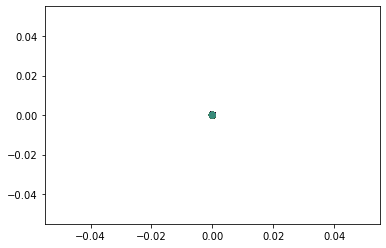

In [96]:
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c = y_hat, alpha = 0.25)

In [97]:
print(f"Accuracy: {accuracy(y2, y_hat):0.3f}")

Accuracy: 0.911


In [98]:
# Boolean expression takes the indices of y2 when y2 is equal to 1 and put those indices into y,
# and the other one does the same thing but puts the indces into y hat  
y2[y2==1]
y_hat[y2==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [99]:
y2[y2==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [100]:
y_hat[y2==1]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [101]:
accuracy(y2[y2==1],y_hat[y2==1])

0.9674008810572687

In [102]:
y2[y2==0]
y_hat[y2==0]
accuracy(y2[y2==0], y_hat[y2==0])

0.9704081632653061

In [103]:
y2[y2==2]
y_hat[y2==2]
accuracy(y2[y2==2], y_hat[y2==2])

0.9127906976744186

In [104]:
y2[y2==3]
y_hat[y2==3]
accuracy(y2[y2==3], y_hat[y2==3])

0.8950495049504951

In [105]:
y2[y2==4]
y_hat[y2==4]
accuracy(y2[y2==4], y_hat[y2==4])

0.8930753564154786

In [106]:
y2[y2==5]
y_hat[y2==5]
accuracy(y2[y2==5], y_hat[y2==5])

0.820627802690583

In [107]:
y2[y2==6]
y_hat[y2==6]
accuracy(y2[y2==6], y_hat[y2==6])

0.94258872651357

In [108]:
y2[y2==7]
y_hat[y2==7]
accuracy(y2[y2==7], y_hat[y2==7])

0.8482490272373541

In [109]:
y2[y2==8]
y_hat[y2==8]
accuracy(y2[y2==8], y_hat[y2==8])

0.9209445585215605

In [110]:
y2[y2==9]
y_hat[y2==9]
accuracy(y2[y2==9], y_hat[y2==9])

0.9236868186323092

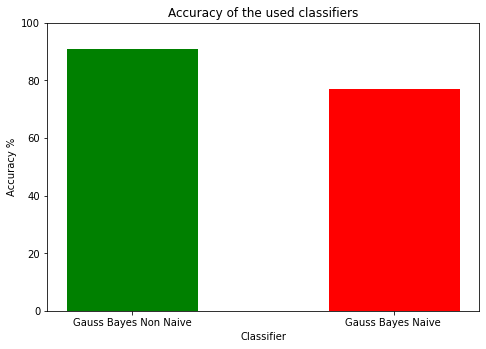

In [135]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Classifier = ['Gauss Bayes Non Naive', 'Gauss Bayes Naive ']
Accuracy = [91 , 77]
ax.bar( Classifier,Accuracy, color=["g","r"], width=[0.5,0.5])
plt.title('Accuracy of the used classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy %')
plt.ylim(0,100)
plt.show()

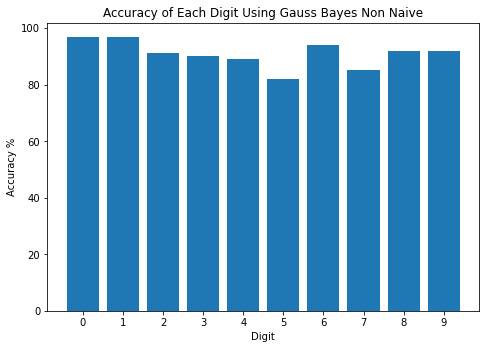

In [133]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
DigitAccuracy = [0,1,2,3,4,5,6,7,8,9]
Accuracy = [97 ,97, 91, 90, 89,82,94,85,92,92]
ax.bar(DigitAccuracy, Accuracy)
plt.title('Accuracy of Each Digit Using Gauss Bayes Non Naive')
plt.xlabel('Digit')
plt.ylabel('Accuracy %')
ax.set_xticks(np.arange(len(DigitAccuracy)))
plt.show()